<a href="https://colab.research.google.com/github/RegisKonan/FinalProject/blob/main/regis_konan_Data_Accimulation_for_Climate2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course : DATA ASSIMILATION

### Name : REGIS KONAN MARCEL DJAHA

## Define the Packages 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## QUESTION 2

### Define the process model

In [ ]:
def process(q,alpha,N):
    X0 = np.random.normal(0,1)
    X = np.zeros(N)
    X[0] = X0
    for i in range (1,N):
        delta = np.random.normal(0,q)
        X[i] = alpha * X[i-1] + delta
    return X

### Define the Data model

In [ ]:
def data(X,r,T,T1,T2):
    N = len(X)
    Y = np.zeros(N)
    for i in range(0,N):
        eps = np.random.normal(0,r)
        if i in range(0,T1+1):
            Y[i]=X[i]+eps
        if i in range(T1,T2+1):
            Y[i]=0.1*X[i]+eps
        if i in range(T2,T+1):
            Y[i]=X[i]+eps
    return Y

### Define the parameters

In [ ]:
alpha=0.8
q=0.4
N=30
r=0.1
T=30
T1=10
T2=20
X=process(alpha,q,N)
Y=data(X,r,T,T1,T2)

### a) Plot the process model and the data model 

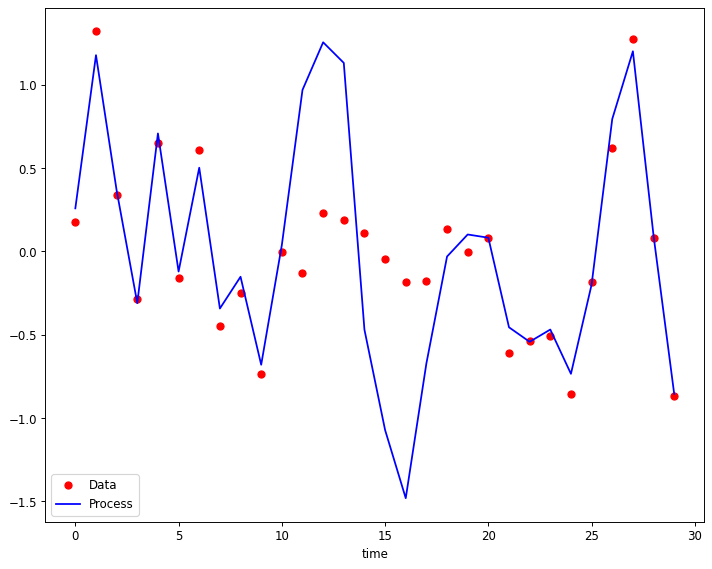

In [ ]:
plt.figure(figsize=(10,8), dpi = 85)
plt.plot(Y, 'o',color='red',label='Data')
plt.plot(X, color ='blue',label='Process')
plt.xlabel('time')
plt.legend()
plt.show()

### Decribe

The state estimate follows similar pattern as the data if it is between 0 $T_1$ or if it is between $T_1 +1$  and $T_2$ but does not follow similar pattern if it is between $T_1$ +1 and $T$

# b) Kalman filter function

In [ ]:
def Kalman_filter(M,Q,R,H,y,mu0,sigma0):
    N = len(y)
    mu_t = np.zeros(N)
    sigma_t = np.zeros(N)
    mu_new = np.zeros(N+1)
    mu_new[0] = mu0
    sigma_new = np.zeros(N+1)
    sigma_new[0] = sigma0
    for t in range(1,N+1):
        mu_t[t-1] = M*mu_new[t-1]
        sigma_t[t-1] = Q + M*sigma_new[t-1]*M
        k = sigma_t[t-1]*H*(H*sigma_t[t-1]*H + R)**-1
        mu_new[t] = mu_t[t-1] + k*(y[t-1] - H*mu_t[t-1])
        sigma_new[t] = (1 - k*H)*sigma_t[t-1] 
    return mu_t, mu_new[1:], sigma_t, sigma_new[1:],k

q=0.4
r=0.1
alpha=0.8
mu0 =0
sigma0=1
Q = q**2
R = r**2
H = 1
mu_t,mu_new,sigma_t,sigma_new,k =Kalman_filter(alpha,Q,R,H,Y,mu0,sigma0)

In [ ]:
def func(mu_t,mu_new,sigma_t,sigma_new,y):
    N = len(y)
    Xforecast = np.zeros(N)
    Xfilter = np.zeros(N)
    for t in range(0,N):
        Xfilter[t] = np.random.normal(mu_new[t],np.sqrt(sigma_new[t]))
        Xforecast[t] = np.random.normal(mu_t[t],np.sqrt(sigma_t[t]))
    return Xforecast , Xfilter

### Plot filtered and Forecasted states estimates

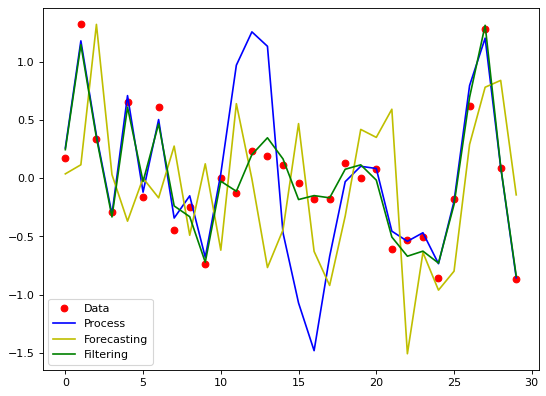

In [ ]:
Xforecast,Xfilter = func(mu_t,mu_new,sigma_t,sigma_new,Y)
plt.figure(figsize=(8,6), dpi = 80)
plt.plot(Y,'o', label = 'Data', color='red')
plt.plot(X,label = 'Process', color ='blue')
plt.plot(Xforecast, label = 'Forecasting', color ='y')
plt.plot(Xfilter, label = 'Filtering', color='green')
plt.legend()
plt.show()

### Discuss

The data and the state estimate behave in the same way as we saw in (a) above. Filter estimate a follow the same pattern as the data but the Forecast estimate are far from the data pattern.

### c) Standard Deviation of the filtered and forecasted with error

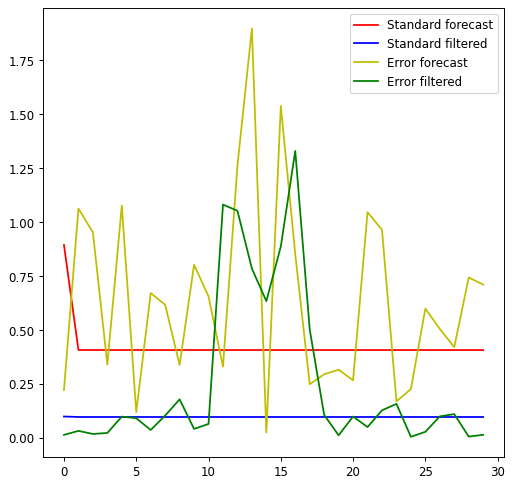

In [ ]:
plt.figure(figsize=(7,7), dpi = 85)
plt.plot(np.sqrt(sigma_t),label='Standard forecast',color='red') 
plt.plot(np.sqrt(sigma_new),label='Standard filtered',color='blue')
plt.plot(abs(Xforecast-X),label='Error forecast',color='y')
plt.plot(abs(Xfilter-X),label='Error filtered',color='green')
plt.legend()
plt.show()

### Discuss

Standard forecast is constant all through 0 to 30 and that of the filtered is also constant. But the errors are changing.

## Question 3

### Define process model

In [ ]:
def process2(alpha2,q2):
    X_0 = np.random.normal(0.1,0.01)
    X = np.zeros(41)
    X[0] = X_0
    for i in range (1,41):
        delta2 = np.random.normal(0,q2)
        X[i] = alpha2 * X[i-1]*(1-X[i-1]) + delta2
    return X

### Define Data model

In [ ]:
def data2(X,r):
    N2 = len(X)
    Y = np.zeros(N2)
    for i in range(0,N2):
        eps2 = np.random.normal(0,r)
        Y[i]=X[i]+eps2
    return Y

In [ ]:
alpha2=0.9
q2=0.001
r=0.005

### a) Plot the process model and the data model 

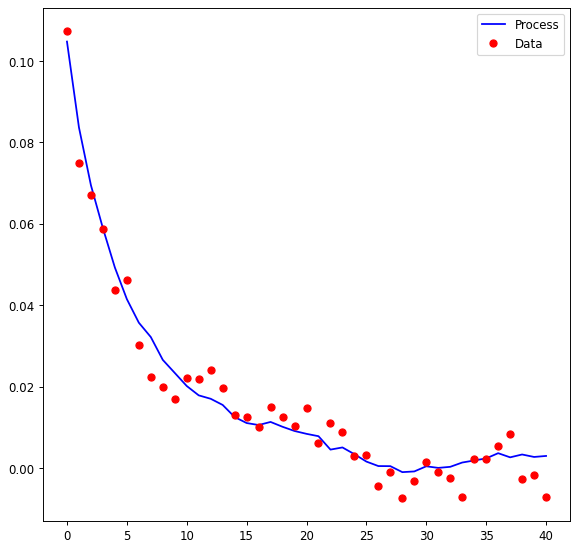

In [ ]:
Xprocess=process2(alpha2,q2)
Ydata=data2(Xprocess,r)
plt.figure(figsize=(8,8), dpi = 85)
plt.plot(Xprocess,color ='blue',label='Process')
plt.plot(Ydata,'o',color='red',label='Data')
plt.legend()
plt.show()

### Discuss

For modest values of q, the data and process models are closely linked. For modest uncertainty in the data model, we can conclude that the data can explain the process.

## b)

### Create a the function approximation

In [ ]:
def approximation(a0,process2):
    N=len(process2)
    M_2=np.zeros(N2)
    for i in range(N2):
        M_2[i]=a0*(1-2*process2[i])
    return M_2

### Define extended Kalman 

In [ ]:
def KALMAN_EXT(mu_0,sig_0,M,M_2,Q,R,H,y):
    N = len(y)
    mu_T = np.zeros(N2)
    sig_T = np.zeros(N2)
    mu_NEW = np.zeros(N2+1)
    mu_NEW[0] = mu_0
    sig_NEW = np.zeros(N2+1)
    sig_NEW[0] = sig_0
    for t in range(1,N2+1):
        mu_T[t-1] = M*mu_NEW[t-1]
        sig_T[t-1] = Q + M_2[t-1]*sig_NEW[t-1]*M_2[t-1]
        k = sig_T[t-1]*H*(H*sig_T[t-1]*H + R)**-1
        mu_NEW[t] = mu_T[t-1] + k*(y[t-1] - H*mu_T[t-1])
        sig_NEW[t] = (1 - k*H)*sig_T[t-1] 
    return mu_T, mu_NEW[1:], sig_T, sig_NEW [1:]

In [ ]:
def estimation(mu_T,mu_NEW,sig_T,sig_NEW,y):
    N = len(y)
    X_FORE = np.zeros(N2)
    X_FILT = np.zeros(N2)
    for t in range(0,N2):
        X_FORE[t] = np.random.normal(mu_T[t],np.sqrt(sig_T[t]))
        X_FILT[t] = np.random.normal(mu_NEW[t],np.sqrt(sig_NEW[t]))
    return X_FORE , X_FILT

### Define the parameters

In [ ]:
q2=0.001
r=0.005
mu_0 =0.1
sig_0=0.01
Q = q2**2
R = r**2
H = 1
a=0.9
N2=41

# Plot the states and data with the filtered and forecasted

In [ ]:
N_X1=process2(a,q2)

M_2=approximation(a,N_X1)
mu_T,mu_NEW,sig_T,sig_NEW= KALMAN_EXT(mu_0,sig_0,a,M_2,Q,R,H,Ydata)
N_XFORE,N_XFILT = estimation(mu_T,mu_NEW,sig_T,sig_NEW,Ydata)

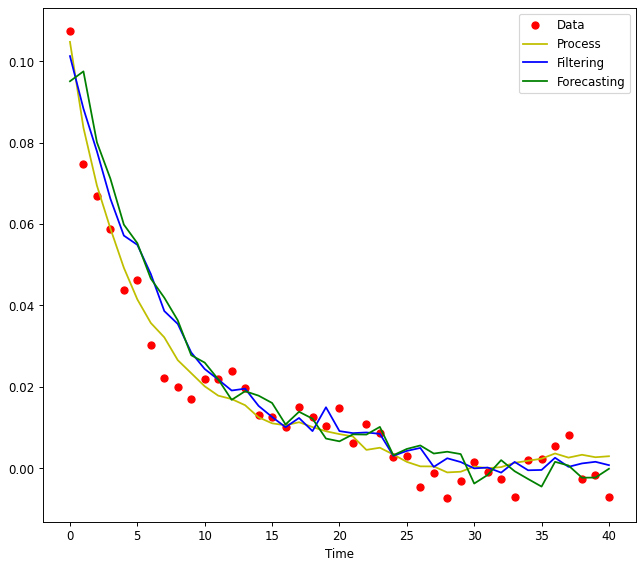

In [ ]:
plt.figure(figsize=(9,8), dpi = 85)
plt.plot(Ydata,'o', label = 'Data', color='red')
plt.plot(Xprocess,label = 'Process', color ='y')
plt.plot(N_XFILT, label = 'Filtering', color='blue')
plt.plot(N_XFORE, label = 'Forecasting', color ='green')
plt.xlabel('Time')
plt.legend()
plt.show()

### Discuss

The filter and the forcest fit the data pretty well for small $r$ values and large $q$ values. As a result, we may conclude that in this circumstance, the data and method can be used for forecasting and filtering.

### c) Plot the standard deviation of the filtered and forecasted estimates with their errors on the same graph

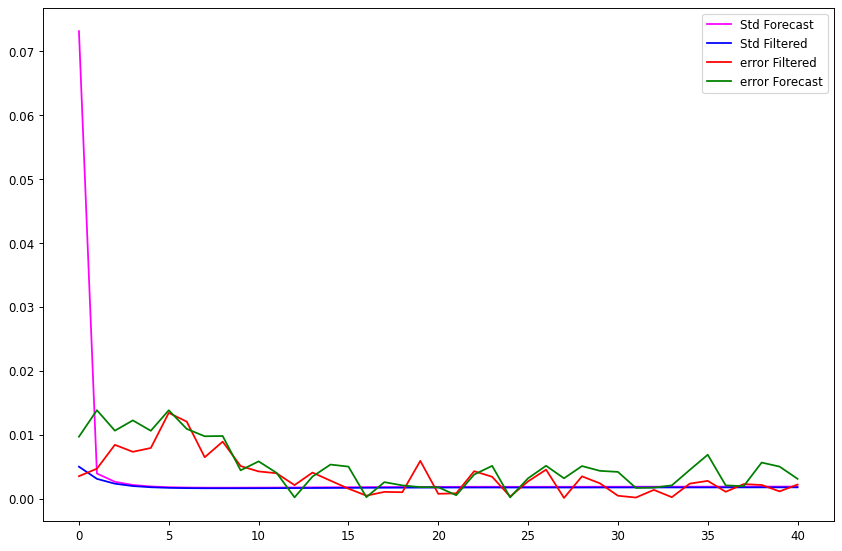

In [ ]:
plt.figure(figsize=(12,8), dpi = 85)

plt.plot(np.sqrt(sig_T),label='Std Forecast',color ='magenta')
plt.plot(np.sqrt(sig_NEW),label='Std Filtered',color ='blue')
plt.plot(abs(N_XFILT-Xprocess),label='error Filtered',color ='red')
plt.plot(abs(N_XFORE-Xprocess),label='error Forecast',color ='green')
plt.legend()
plt.show()

Discuss

The standard forecast is constant from 0 to 30 and so is the filtered one. But the errors change little.